In [1]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [2]:
uri = "bolt://34.101.204.95:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [3]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [4]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[-0.48007139563560486, 0.6460448503494263, -0....",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[0.022821197286248207, 0.3413693904876709, -0....",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
3,"[-0.0965781956911087, 0.03939099982380867, -0....",Tanaman layu,[Gejala],Gejala layu pada tanaman padi adalah tanda yan...
4,"[0.39404162764549255, -0.3328622579574585, 0.4...",Bibit mati,[Gejala],Gejala kematian bibit padi dapat terlihat dala...
...,...,...,...,...
100,"[0.6989031434059143, -0.3856666088104248, 0.55...",Bacillus thuringiensis var. israelensis,[Pestisida],Bacillus thuringiensis var. israelensis (Bti) ...
101,"[0.4118303656578064, -0.5445472598075867, -0.1...",Belalang Sawah,[HamaPadi],"Belalang sawah, atau Nilaparvata lugens, adala..."
102,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],Penyakit bakteri garis daun pada padi disebabk...
103,"[-0.24614253640174866, 0.1480824500322342, -0....",Fusarium spp.,[PatogenPadi],Fusarium spp. adalah kelompok jamur patogen ya...


In [33]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
            MATCH (n)-[r]->(m)
            RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
                type(r) AS relationship_type,
                m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],diberikanFungisida,"[-0.0959160327911377, 0.14652732014656067, 0.0...",Pyraclostrobin,[Fungisida]
1,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.10879369080066681, 0.07831495255231857, -0....",Bulir mengalami kerusakan,[Gejala]
2,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.6842259168624878, -0.09251340478658676, 0.0...",Bulir pecah,[Gejala]
3,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.24190634489059448, 0.04473293945193291, 0.0...",Tilletia barclayana,[PatogenPadi]
4,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.2921145260334015, -0.051839686930179596, -0...",Bulir terdapat bercak,[Gejala]
...,...,...,...,...,...,...,...
142,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[-0.3528200387954712, -0.11492333561182022, 0....",Daun mengering,[Gejala]
143,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],diberikanBakterisida,"[-0.43456384539604187, 0.053754474967718124, 0...",Fosfit,[Bakterisida]
144,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],diberikanBakterisida,"[-0.5201900601387024, -0.21731899678707123, -0...",Streptomisin,[Bakterisida]
145,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[-0.8089390993118286, -0.32538989186286926, 0....",Malai mengalami kerusakan,[Gejala]


In [52]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
            WHERE any(label IN labels(n) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi']) 
            AND any(label IN labels(m) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi'])
        RETURN 
        m.Vector AS source_vector, m.label AS source_label, labels(m) AS source_class, 
        type(r) AS relationship_type,
        n.Vector AS target_vector, n.label AS target_label, labels(n) AS target_class

        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.10879369080066681, 0.07831495255231857, -0....",Bulir mengalami kerusakan,[Gejala],memilikiGejala,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi]
1,"[0.6842259168624878, -0.09251340478658676, 0.0...",Bulir pecah,[Gejala],memilikiGejala,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi]
2,"[0.2921145260334015, -0.051839686930179596, -0...",Bulir terdapat bercak,[Gejala],memilikiGejala,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi]
3,"[-0.45804303884506226, -0.5417109131813049, -0...",Bulir berubah warna,[Gejala],memilikiGejala,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi]
4,"[-0.3528200387954712, -0.11492333561182022, 0....",Daun mengering,[Gejala],memilikiGejala,"[-0.676706850528717, 0.01814153976738453, -0.2...",Garis Merah,[PenyakitPadi]
...,...,...,...,...,...,...,...
62,"[-0.5924320220947266, 0.03590627387166023, -0....",Daun terdapat garis,[Gejala],memilikiGejala,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi]
63,"[-0.07189726829528809, -0.842198371887207, 0.1...",Batang mengalami kerusakan,[Gejala],memilikiGejala,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi]
64,"[0.6085869073867798, 0.22522272169589996, 0.51...",Daun menguning,[Gejala],memilikiGejala,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi]
65,"[-0.3528200387954712, -0.11492333561182022, 0....",Daun mengering,[Gejala],memilikiGejala,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi]


In [53]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)


Accuracy: 0.9523809523809523


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Assuming Rice_KG_df is a pandas DataFrame
# Extract features and target variable
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())
relationship_types = Rice_KG_df['relationship_type'].values

# Encode relationship types
label_encoder = LabelEncoder()
encoded_relationship_types = label_encoder.fit_transform(relationship_types)

# Concatenate source vectors and encoded relationship types to form X
X = np.concatenate([source_vectors, encoded_relationship_types.reshape(-1, 1)], axis=1)

# Use KMeans clustering to convert target vectors into discrete classes
n_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(target_vectors)
y = kmeans.labels_

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model with multiple metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
rf_conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", rf_conf_matrix)

# Optionally, use cross-validation for a better estimate of performance
cross_val_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_scores.mean())


c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy: 0.7142857142857143
Precision: 0.8066378066378066
Recall: 0.7142857142857143
F1 Score: 0.7118847539015606
Confusion Matrix:
 [[1 0 0 0 0]
 [0 6 0 0 0]
 [0 0 1 0 0]
 [0 2 0 2 0]
 [0 3 0 1 5]]


c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated Accuracy: 0.643956043956044


In [65]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Encode categorical variables if needed
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original data
for i in range(X_encoded.shape[1]):  # Iterate over columns (features)
    X_encoded[:, i] = label_encoder.fit_transform(X_encoded[:, i])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)


Accuracy: 0.9047619047619048


In [55]:
#Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3540 - loss: 1.0446  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.7835 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.5878 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9391 - loss: 0.4752 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.4029 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.3112 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.2485 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9578 - loss: 0.2322 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.2117 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.1522 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1695 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.1912 


In [56]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", cnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6493 - loss: 0.9825  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.7500 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.5202 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.2998 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.1672 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.1549 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.2286 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9391 - loss: 0.2084 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9516 - loss: 0.2223 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.3222 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.2034 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9578 - loss: 0.1897 


In [57]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Reshape the input data to be suitable for an RNN (assuming sequential data)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(len(np.unique(y_train)), activation='softmax')  # Adjust output units to match the number of unique classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model using the reshaped data
model.fit(X_train_rnn, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model using the reshaped test data
loss, rnn_accuracy = model.evaluate(X_test_rnn, y_test)
print("Accuracy:", rnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5095 - loss: 1.0744
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 1.0011 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9703 - loss: 0.9292 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.8567 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.8002 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9578 - loss: 0.7314 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.6702 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.6016 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.5193 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.5171 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.4080 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.3689 
Ep

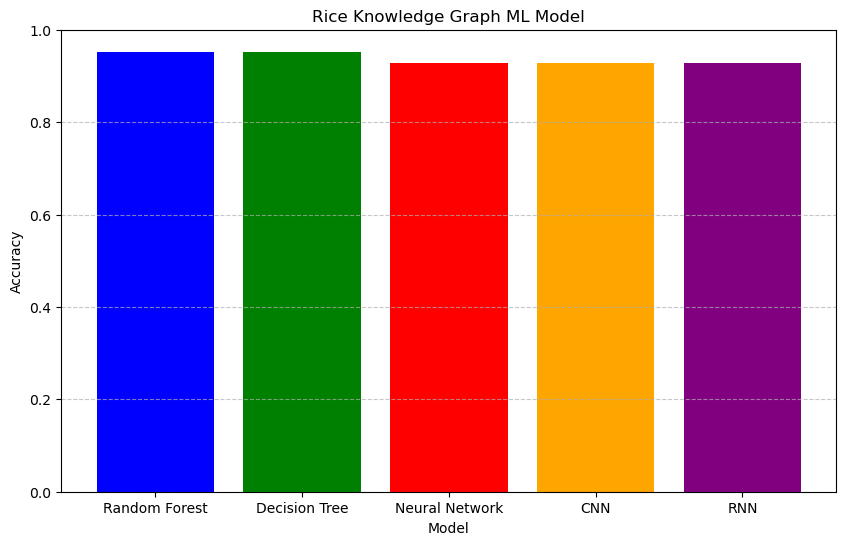

In [58]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [rf_accuracy, dt_accuracy, nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph ML Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
